## Problem statement

it is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

### importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("C:/Users/meena/Downloads/creditcard.csv/creditcard.csv")

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df['Class'].unique()

array([0, 1], dtype=int64)

In [5]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [6]:
df.shape

(284807, 31)

In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### EDA

C:\Users\meena\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Class', ylabel='Count'>

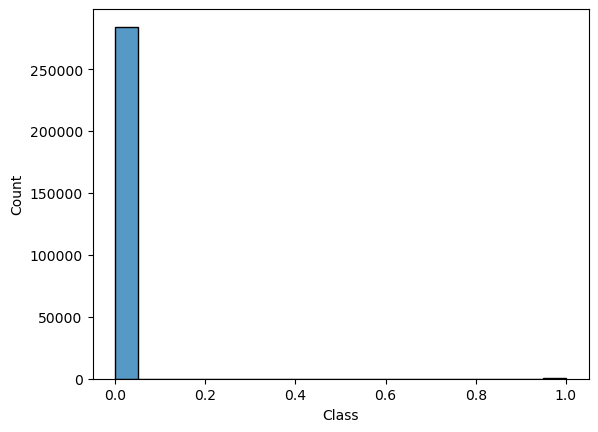

In [10]:
sns.histplot(data=df,x='Class')

C:\Users\meena\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Class', ylabel='Density'>

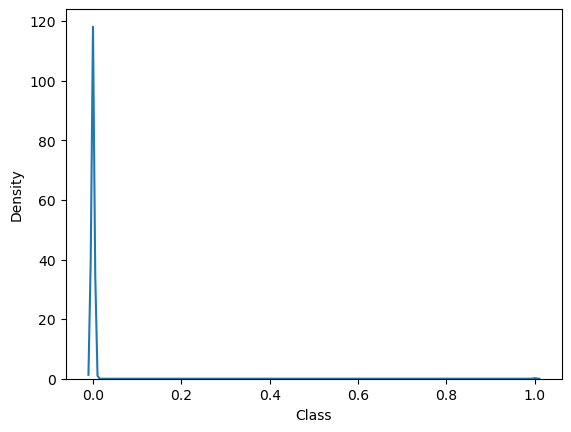

In [11]:
sns.kdeplot(data=df,x='Class')

<Axes: >

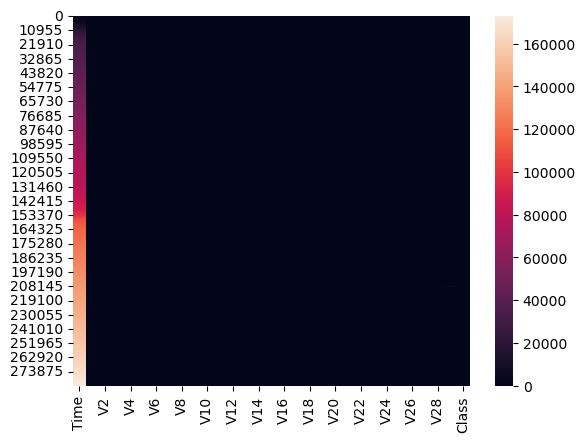

In [12]:
sns.heatmap(data=df)

<Axes: xlabel='Class', ylabel='count'>

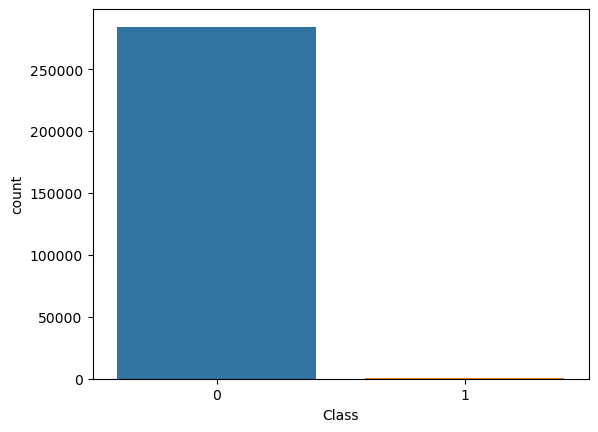

In [13]:
sns.countplot(data=df,x='Class')

<Axes: xlabel='Class', ylabel='Time'>

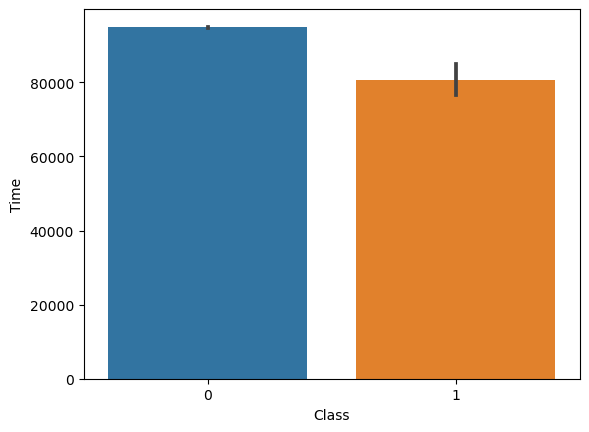

In [14]:
sns.barplot(data=df,x='Class',y='Time')

In [15]:
#sns.countplot(data=df,y='Amount')

<Axes: xlabel='Class', ylabel='Amount'>

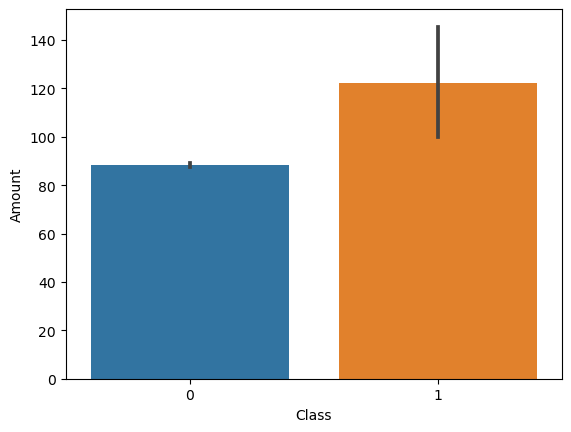

In [16]:
sns.barplot(data=df,x='Class',y='Amount')

In [17]:
df[df['Class']==1].describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,...,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.0
mean,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321,1.0
std,47835.365138,6.783687,4.291216,7.110937,2.873318,5.372468,1.858124,7.206773,6.797831,2.500896,...,3.869304,1.494602,1.579642,0.515577,0.797205,0.471679,1.376766,0.547291,256.683288,0.0
min,406.000000,-30.552380,-8.402154,-31.103685,-1.313275,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.152671,-7.263482,-1.869290,0.000000,1.0
25%,41241.500000,-6.036063,1.188226,-8.643489,2.373050,-4.792835,-2.501511,-7.965295,-0.195336,-3.872383,...,0.041787,-0.533764,-0.342175,-0.436809,-0.314348,-0.259416,-0.020025,-0.108868,1.000000,1.0
50%,75568.500000,-2.342497,2.717869,-5.075257,4.177147,-1.522962,-1.424616,-3.034402,0.621508,-2.208768,...,0.592146,0.048434,-0.073135,-0.060795,0.088371,0.004321,0.394926,0.146344,9.250000,1.0
75%,128483.000000,-0.419200,4.971257,-2.276185,6.348729,0.214562,-0.413216,-0.945954,1.764879,-0.787850,...,1.244611,0.617474,0.308378,0.285328,0.456515,0.396733,0.826029,0.381152,105.890000,1.0
max,170348.000000,2.132386,22.057729,2.250210,12.114672,11.095089,6.474115,5.802537,20.007208,3.353525,...,27.202839,8.361985,5.466230,1.091435,2.208209,2.745261,3.052358,1.779364,2125.870000,1.0


In [18]:
df[df['Class'] == 0].sample(n=492, random_state=42).mean()

Time      95052.758130
V1            0.153312
V2            0.009649
V3           -0.038029
V4           -0.027323
V5            0.061966
V6           -0.053962
V7            0.013795
V8            0.014911
V9            0.037348
V10           0.036243
V11           0.009857
V12          -0.004117
V13           0.055990
V14           0.016583
V15           0.018341
V16           0.011533
V17           0.008115
V18          -0.012737
V19           0.007995
V20           0.015030
V21           0.014059
V22          -0.020781
V23           0.013223
V24          -0.007257
V25           0.024646
V26          -0.027696
V27           0.011070
V28          -0.002305
Amount       80.348354
Class         0.000000
dtype: float64

In [19]:
df1=df.drop_duplicates()

In [20]:
df1['Class'].value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

In [21]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

## Under_sampling

building a sample dataset of equal no. of fraudas and normal transactions

In [22]:
Normal=df1[df1['Class'] == 0].sample(n=473)

In [23]:
fraud=df1[df1['Class']==1]

In [24]:
df2=pd.concat([Normal,fraud],ignore_index=True)

In [25]:
df2

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,75031.0,1.201002,-1.453061,0.706460,-1.463716,-1.445522,0.500696,-1.353359,0.224517,-1.969885,...,0.107246,0.592224,-0.036866,-0.273101,0.152152,-0.072695,0.069098,0.026750,99.00,0
1,42281.0,1.159876,0.067383,-0.129461,0.387488,-0.080577,-0.745775,0.343278,-0.135843,-0.338436,...,-0.328298,-1.166623,0.054133,-0.023281,0.259086,0.137808,-0.082203,0.003923,59.95,0
2,42703.0,1.259453,-0.881605,-0.251629,-0.468638,-0.924510,-0.797347,-0.236509,-0.183534,-0.491799,...,-0.447103,-0.979640,-0.126417,-0.114248,0.402350,1.119383,-0.099184,0.005063,99.90,0
3,129172.0,-0.731488,0.326429,-0.245125,1.179385,0.752979,-0.661118,1.766870,-0.252819,-0.687203,...,0.270280,0.585241,0.323571,1.128025,0.097197,-0.441848,0.347705,0.275973,204.16,0
4,67957.0,-1.549441,0.472302,0.302413,0.870828,-1.164011,1.467359,0.750566,-2.880207,-1.131035,...,-1.261051,0.158455,-1.662746,-0.411659,-0.444847,-0.422018,0.449009,0.056264,641.66,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
942,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
943,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
944,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [26]:
df2.corr(numeric_only=True)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.230581,-0.221007,0.142331,-0.218485,0.277361,0.101188,0.215713,-0.181001,0.136221,...,-0.052865,0.156351,0.078106,-0.051274,-0.195591,-0.062688,-0.112990,-0.002730,0.023075,-0.117606
V1,0.230581,1.000000,-0.741697,0.870263,-0.605267,0.856285,0.361740,0.862653,-0.231824,0.659582,...,0.115112,-0.106298,-0.014217,-0.104270,-0.084987,0.034770,0.092219,0.185574,-0.050548,-0.415306
V2,-0.221007,-0.741697,1.000000,-0.833916,0.665577,-0.765382,-0.368055,-0.826783,0.152651,-0.703101,...,-0.100420,0.113351,0.050751,0.036791,0.089334,0.033852,-0.118305,0.105727,-0.292188,0.483220
V3,0.142331,0.870263,-0.833916,1.000000,-0.761141,0.841642,0.504447,0.880288,-0.291477,0.765341,...,0.070341,-0.098125,-0.009433,0.008505,-0.078589,-0.036849,-0.015025,0.094412,-0.002888,-0.557205
V4,-0.218485,-0.605267,0.665577,-0.761141,1.000000,-0.558128,-0.432557,-0.709396,0.142452,-0.790264,...,-0.037008,0.150074,0.013793,-0.073423,-0.049820,0.155737,0.067227,-0.055317,-0.004771,0.702191
V5,0.277361,0.856285,-0.765382,0.841642,-0.558128,1.000000,0.286063,0.825143,-0.313003,0.643900,...,0.082489,-0.116167,-0.079252,-0.155190,-0.085116,0.040070,0.093721,0.124025,-0.125809,-0.348796
V6,0.101188,0.361740,-0.368055,0.504447,-0.432557,0.286063,1.000000,0.359606,-0.543239,0.386109,...,-0.238669,0.168405,0.257657,-0.027418,-0.140553,-0.046880,-0.228877,-0.105430,0.249795,-0.432309
V7,0.215713,0.862653,-0.826783,0.880288,-0.709396,0.825143,0.359606,1.000000,-0.053569,0.773576,...,0.210737,-0.250741,-0.008097,-0.073927,0.073031,-0.016759,0.155586,0.091524,0.156022,-0.464205
V8,-0.181001,-0.231824,0.152651,-0.291477,0.142452,-0.313003,-0.543239,-0.053569,1.000000,-0.088127,...,0.420371,-0.359336,-0.278660,0.045919,0.291530,0.015269,0.376608,0.053799,-0.024473,0.117910
V9,0.136221,0.659582,-0.703101,0.765341,-0.790264,0.643900,0.386109,0.773576,-0.088127,1.000000,...,0.170681,-0.256536,-0.061924,-0.001531,0.020188,-0.162862,0.040988,0.096498,0.036718,-0.554944


In [27]:
df2.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

C:\Users\meena\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\meena\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Time', ylabel='Amount'>

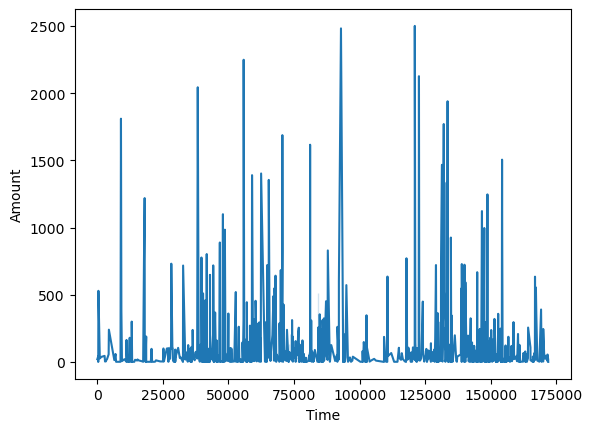

In [28]:
sns.lineplot(data=df2,x='Time',y='Amount')

In [29]:
x=df2.drop(columns=['Class'])

In [30]:
x.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,75031.0,1.201002,-1.453061,0.706460,-1.463716,-1.445522,0.500696,-1.353359,0.224517,-1.969885,...,-0.155522,0.107246,0.592224,-0.036866,-0.273101,0.152152,-0.072695,0.069098,0.026750,99.00
1,42281.0,1.159876,0.067383,-0.129461,0.387488,-0.080577,-0.745775,0.343278,-0.135843,-0.338436,...,-0.012180,-0.328298,-1.166623,0.054133,-0.023281,0.259086,0.137808,-0.082203,0.003923,59.95


In [31]:
y=df2['Class']

### 1.Logistic Regression

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [34]:
model_lr=LogisticRegression()

In [35]:
model_lr.fit(x_train,y_train)

C:\Users\meena\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#### for training data

In [36]:
y_pred_train=model_lr.predict(x_train)

In [37]:
accuracy_lr_train=accuracy_score(y_train,y_pred_train)

In [38]:
accuracy_lr_train

0.9338624338624338

#### for testing data

In [39]:
y_pred_test=model_lr.predict(x_test)

In [40]:
accuracy_lr_test=accuracy_score(y_test,y_pred_test)

In [84]:
from sklearn.metrics import precision_score,f1_score,recall_score

In [85]:
precision_score(y_pred_test,y_test)

0.9438202247191011

In [86]:
f1_score(y_pred_test,y_test)

0.9281767955801105

In [87]:
recall_score(y_pred_test,y_test)

0.9130434782608695

In [88]:
accuracy_score(y_pred_test,y_test)

0.9315789473684211

In [41]:
accuracy_lr_test

0.9315789473684211

### 2.KNNCLASSIFIER

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [43]:
model_knn=KNeighborsClassifier(n_neighbors=9)

In [44]:
para_grid={'n_neighbors':[2,8,5,6,9,4,3]}

In [45]:
grid_search=GridSearchCV(model_knn,para_grid,cv=5,scoring='accuracy')

In [46]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=9),
             param_grid={'n_neighbors': [2, 8, 5, 6, 9, 4, 3]},
             scoring='accuracy')

In [47]:
grid_search.best_params_

{'n_neighbors': 4}

In [48]:
model_knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=9)

### for training data

In [49]:
y_pred_train_knn=model_knn.predict(x_train)

In [50]:
accuracy_knn_train=accuracy_score(y_pred_train_knn,y_train)

In [51]:
accuracy_knn_train

0.7248677248677249

### for testing data

In [52]:
y_pred_test_knn=model_knn.predict(x_test)

In [53]:
accuracy_knn_test=accuracy_score(y_pred_test_knn,y_test)

In [54]:
accuracy_knn_test

0.6157894736842106

### 3.Decision_tree_Classifier

In [55]:
from sklearn.tree import DecisionTreeClassifier

In [56]:
model_dt=DecisionTreeClassifier(criterion='gini',max_depth=4,max_leaf_nodes=6)

In [57]:
para_grid_={'max_depth':[2,3,4,5,6,7,8,9,10],'criterion':['gini','entropy'],'max_leaf_nodes':[2,3,4,5,6,7,8,9]}

In [58]:
grid_search_dt=GridSearchCV(model_dt,para_grid_,cv=5,scoring='accuracy')

In [59]:
grid_search_dt.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=4, max_leaf_nodes=6),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9]},
             scoring='accuracy')

In [60]:
grid_search_dt.best_params_

{'criterion': 'entropy', 'max_depth': 2, 'max_leaf_nodes': 4}

In [61]:
model_dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=6)

### for training data

In [62]:
y_pred_train_dt=model_dt.predict(x_train)

In [63]:
accuracy_dt_train=accuracy_score(y_pred_train_dt,y_train)

In [64]:
accuracy_dt_train

0.9365079365079365

### for testing data

In [65]:
y_pred_test_dt=model_dt.predict(x_test)

In [66]:
accuracy_dt_test=accuracy_score(y_test,y_pred_test_dt)

In [67]:
accuracy_dt_test

0.9315789473684211

### 4. randomforestclassifier

In [68]:
from sklearn.ensemble import RandomForestClassifier

In [69]:
model_forest=RandomForestClassifier()

In [70]:
#para_grid_rf={'n_estimators':[100,50,40,60,20,30,80],'max_depth':[2,3,4,5,6,7,8,9,10],'criterion':['gini','entropy'],'max_leaf_nodes':[2,3,4,5,6,7,8,9]}

In [71]:
#grid_search_rf=GridSearchCV(model_forest,para_grid_rf,cv=5,scoring='accuracy')

In [72]:
#grid_search_rf.fit(x_train,y_train)

In [73]:
#grid_search_rf.best_params_

### for training data

In [74]:
model_forest.fit(x_train,y_train)

RandomForestClassifier()

In [75]:
y_pred_train_rf=model_forest.predict(x_train)

In [76]:
accuracy_rf_train=accuracy_score(y_pred_train_rf,y_train)

In [77]:
accuracy_rf_train

1.0

### for testing data3

In [78]:
y_pred_test_rf=model_forest.predict(x_test)

In [79]:
accuracy_rf_test=accuracy_score(y_pred_test_rf,y_test)

In [80]:
accuracy_rf_test

0.9578947368421052

### comparing all accuracy models

In [81]:
accuracy_model={'model_name':['LogisticRegression','KNeighborsClassifier','DecisionTreeClassifier','RandomforestClassifier'],
                 'Training_accuracy':[accuracy_lr_train,accuracy_knn_train,accuracy_dt_train,accuracy_rf_train],
                 'Testing_accuracy':[accuracy_lr_test,accuracy_knn_test,accuracy_dt_test,accuracy_rf_test]}

In [82]:
classifier=pd.DataFrame(accuracy_model)

In [83]:
classifier

,model_name,Training_accuracy,Testing_accuracy
0,LogisticRegression,0.933862,0.931579
1,KNeighborsClassifier,0.724868,0.615789
2,DecisionTreeClassifier,0.936508,0.931579
3,RandomforestClassifier,1.000000,0.957895
